In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    ''' movies and persons'''
    
    def __init__(self, name, category, props={}): 
        self.name = name 
        self.category =  category
        self.props = props

    def get_name(self): 
        '''Get the name of the node'''
        return self.name 
    
    def get_category(self):
        '''Get the category of the node'''
        return self.category
    
    def get_property(self, key):
        '''Get the value for a specified property key'''
        return self.props[key]
    
    def set_property(self, key, value):
        '''Assign the key/value pair to the node'''
        self.props[key] = value

    
    def get_all_properties(self):
        '''Return all properties for a given nodeas a dictionary'''
        return self.props
    
    def __eq__(self, other):
        '''Are two nodes, u and v, the same?  E.g., u==v?'''
        return  self.name == other.get_name() and self.category == other.get_category() and self.props == other.get_all_properties()
    
    def __hash__(self):
        '''A hashing function so that nodes can be stored as dictionary keys'''
        return hash(self.name)
    
    def __repr__(self):
        '''string repr of nodes'''
        node_str = ''
        node_str += f'{self.name}'
        return node_str
    
class Relationship:
    '''relationship between person and person or person and movie'''
    
    def __init__(self, category, props={}): 
        self.category =  category
        self.props = props 
    
    def get_category(self): 
        '''Get the category of the relationship'''
        return self.category 
    
    def get_property(self, key):
        '''Get the value for a specified property key'''
        
        # to prepare for the find nodes function where key == None by default
        if key not in self.props:
            return None
        else:
            return self.props[key]
    
    def set_property(self, key, value):
        ''''Assign the key/value pair to theRelationship'''
        self.props[key] = value
    
    def get_all_properties(self): 
        '''Returnall properties for a given relationship'''
        return self.props
    
    def __repr__(self):
        '''string repr of relationships'''
        rel_str = ''
        rel_str += f'{self.category}'
        return rel_str
    
class PropertyGraph():
    '''graph that shows relationships'''
    def __init__(self, nodes=[], relationships=[]): 
        '''The constructorfor a PropertyGraph'''
        # initialize dictionary to store nodes and relationships 
        self.G = {}
        for n in nodes:
            self.add_node(n)
        for n, m, rel in relationships:
            self.add_relationships(n, m, rel)
    
    def add_node(self, n): 
        '''Add a node to the graph'''
        if n not in self.G:
            self.G[n] = set()
        
    def add_relationship(self, n,m,rel):
        '''Add a relationship(rel) to the graphconnecting node n to node m.'''
        self.G[(n,m)] = rel
        
    
    def find_nodes(self, name=None, category=None, key=None, value=None):
        '''Find nodes meeting certain criteria.  For example, having a particular name / label 
        or category type, or matching a specific property.
        These constraints are considered to be ANDs.'''
        
        # innitialize list to store nodes
        self.L = []
        for key, value in self.G.items():
            if name or category or key or value:
                if key[0].get_name() == name or key[0].get_category() == category or key[0].get_property(key) == value:
                    self.L.append(key[0])
        return self.L
        

    def subgraph(self, nodes):
        '''Return the subgraph as a PropertyGraph consisting of a specified set of 
            nodes and any interconnecting edges/relationships.'''
            
        sub = PropertyGraph()
    
        # Add relationships
        for n in nodes:
            for m in nodes:
                if (n,m) in self.G:
                    sub.add_relationship(n, m, self.G[(n,m)])
        return sub          
    
    def adjacent(self, n, node_categogry=None, rel_category=None): 
        '''return all adjacent nodes, possibly constrained to a particular category of nodes
            and/or relationships.You may optionally want to add further constraints on 
            node / relationship properties.'''
        # innitialize list to store adjacent nodes
        adj_nodes = []
        for key, value in self.G.items():
            if node_categogry== None and rel_category == None:
                if key[0].get_name() == n.get_name():
                    adj_nodes.append(key[1])
            elif node_categogry != None and rel_category == None:
                if key[0].get_name() == n.get_name() and key[1].get_category() == node_categogry:
                    adj_nodes.append(key[1])
            else:
                if key[0].get_name() == n.get_name() and key[1].get_category() == node_categogry and value.get_category() == rel_category:
                    adj_nodes.append(key[1])
                
        return adj_nodes
        
                
    
    def __repr__(self):
        '''str repr of graph'''
        graph_str = ''
        for key, value in self.G.items():
            graph_str += f'[{key}] => [{value}]'+'\n'
        return graph_str
    
    def toDF(self,columns=['n', 'm']):
        '''Convert the graph to a pandas dataframe representation'''
        df = pd.DataFrame(columns = columns)
        for (n,m) in self.G:
            df = df.append({columns[0]:n, columns[1]:m}, ignore_index=True)
        return df
    
    def to_color(self):
        '''assign color to nodes. blue to persons and red to movies'''
        colors_dict = {}
        node_color = []
        for key, value in self.G.items():
            if value.get_category() == 'Watched':
                colors_dict[key[0]] = 'b'
                colors_dict[key[1]] = 'r'
            if value.get_category() == 'Knows':
                colors_dict[key[0]] = 'b'
                colors_dict[key[1]] = 'b'
        for key, value in colors_dict.items():
            node_color.append(value)
            
        return node_color
                
    
    def visualize(self,node_size=400, node_color = None, fig = 1):
        df = self.toDF(columns=['n', 'm'])
        G = nx.from_pandas_edgelist(df, df.columns[0], df.columns[1], create_using=nx.DiGraph() ) 
        
        nx.draw(G, with_labels=True, node_size=node_size, node_color=node_color)
        plt.show()
    


[(Reuben, Interstellar)] => [Watched]
[(John, Interstellar)] => [Watched]
[(John, Star Trek)] => [Watched]
[(John, Princess Bride)] => [Watched]
[(John, Top Gun)] => [Watched]
[(Laney, Princess Bride)] => [Watched]
[(Laney, Top Gun)] => [Watched]
[(Laney, Keeping the Faith )] => [Watched]
[(Laney, Ghostbusters)] => [Watched]
[(John, Reuben)] => [Knows]
[(John, Laney)] => [Knows]
[(Laney, John)] => [Knows]



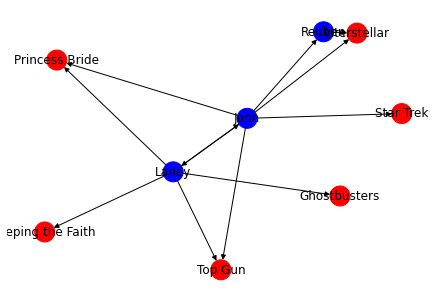

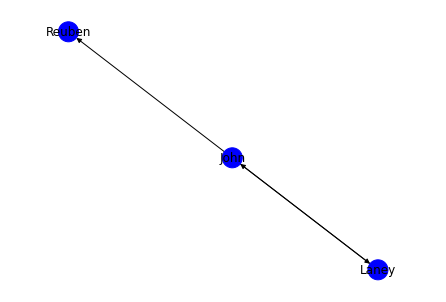

movies john and lanney both watched are [Princess Bride, Top Gun]
movie rec for john is [Keeping the Faith , Ghostbusters]


In [2]:
if __name__ == "__main__": 
    # implement nods
    # movies
    n0 = Node('Interstellar', 'Movie', {'genre': 'Sci-Fi', 'rated': 'PG-13', 'year': 2014})
    n1 =  Node('Star Trek', 'Movie', {'genre': 'Sci-Fi', 'rated': 'PG-13', 'year': 2009})
    n2 =  Node('Princess Bride', 'Movie', {'genre': 'Fantacy', 'rated': 'PG', 'year': 1987})
    n3 =  Node('Top Gun', 'Movie', {'genre': 'Action', 'rated': 'PG', 'year': 1986})
    n4 =  Node('Keeping the Faith ', 'Movie', {'genre': 'Rom-Com', 'rated': 'PG-13', 'year': 2014})
    n5 =  Node('Ghostbusters', 'Movie', {'genre': 'Fantacy', 'rated': 'PG', 'year': 1984})
    
    # people 
    n6 = Node('Reuben', 'Person', {'occupation':'student'})
    n7 = Node('John', 'Person', {'occupation':'professor'})
    n8 = Node('Laney', 'Person', {'occupation':'professor'})
    
    # implement relationships
    rel = Relationship('Watched', {'rating': 5})
    rel1 = Relationship('Watched', {'rating': 4})
    rel2 = Relationship('Watched', {'rating': 3})
    rel3 = Relationship('Knows', {})
    
    # implement property graph 
    g = PropertyGraph()
    
    # add relationships to graph 
    # relationships between movies and people
    g.add_relationship(n6, n0, rel)
    g.add_relationship(n7, n0, rel)
    g.add_relationship(n7, n1, rel)
    g.add_relationship(n7, n2, rel1)
    g.add_relationship(n7, n3, rel2)
    g.add_relationship(n8, n2, rel)
    g.add_relationship(n8, n3, rel1)
    g.add_relationship(n8, n4, rel1)
    g.add_relationship(n8, n5, rel)
    
    # relationships between people 
    g.add_relationship(n7, n6, rel3)
    g.add_relationship(n7, n8, rel3)
    g.add_relationship(n8, n7, rel3)
    
    # show g rep
    print(g)
    
    
    # subgraph 
    sub = g.subgraph([n6, n7, n8])
    
    # visualize 
    g.visualize(node_size=400, node_color = g.to_color(), fig = 1)
    sub.visualize(node_size=400, node_color = sub.to_color(), fig = 1)
    
    # movies john and laney both watched 
    # make lists of movies john and lanney watched respectively 
    movies_j = g.adjacent(n7, 'Movie', 'Watched')
    movies_l = g.adjacent(n8, 'Movie', 'Watched')
    both_watched = []
    
    # find common movies, store in list 
    for i in movies_j:
        for j in movies_l:
            if i == j:
                both_watched.append(i)
    print(f'movies john and lanney both watched are {both_watched}')
            
    # recommendations
    # make a list of people john knows
    people_j = g.adjacent(n7, 'Person', 'Knows')
    movies_rec = []    
    
    # find movies those people watched and store in list 
    for people in people_j:
        movies = g.adjacent(people, 'Movie', 'Watched')
        for movie in movies:
            # select ones that john hasn't watched
            if movie not in movies_j:
                movies_rec.append(movie)
    print(f'movie rec for john is {movies_rec}')
        
        
    
    